In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
!cp /content/gdrive/MyDrive/pcb_data.zip /content

In [5]:
!unzip -q /content/pcb_data.zip -d /content/

In [6]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 37.4 MB/s eta 0:00:00


In [7]:
!yolo detect train data=/content/Data/data.yaml model=yolov8n.pt epochs=20 imgsz=640

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics 8.3.228 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/Data/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=20, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False,

In [8]:
!yolo detect predict model=runs/detect/train/weights/best.pt source=Data/validation/images save=True

Ultralytics 8.3.228 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,007,403 parameters, 0 gradients, 8.1 GFLOPs

image 1/200 /content/Data/validation/images/VID202106071443181-102_jpg.rf.1e3457a8b7e4c1f9962bcf2dfceb4334.jpg: 640x480 1 Cap1, 1 Cap2, 1 Cap3, 1 Cap4, 1 MOSFET, 1 Mov, 1 Resistor, 2 Transformers, 62.4ms
image 2/200 /content/Data/validation/images/VID202106071443181-102_jpg.rf.a75c1726894dfd609bc50ebcfa2d5398.jpg: 640x480 1 Cap1, 1 Cap2, 1 Cap3, 1 Cap4, 1 MOSFET, 1 Mov, 1 Resistor, 2 Transformers, 7.2ms
image 3/200 /content/Data/validation/images/VID202106071443181-102_jpg.rf.b25f373b6a5ee58ae3fdf7a236748ee2.jpg: 640x480 1 Cap1, 1 Cap2, 1 Cap3, 1 Cap4, 1 MOSFET, 1 Mov, 1 Resistor, 2 Transformers, 7.7ms
image 4/200 /content/Data/validation/images/VID202106071443181-108_jpg.rf.50aff86ff16e6db4afc24b918191f473.jpg: 640x480 1 Cap1, 1 Cap2, 1 Cap3, 1 Cap4, 1 MOSFET, 1 Mov, 1 Resistor, 2 Transformers, 7.1ms
image 5/200 /content/Da

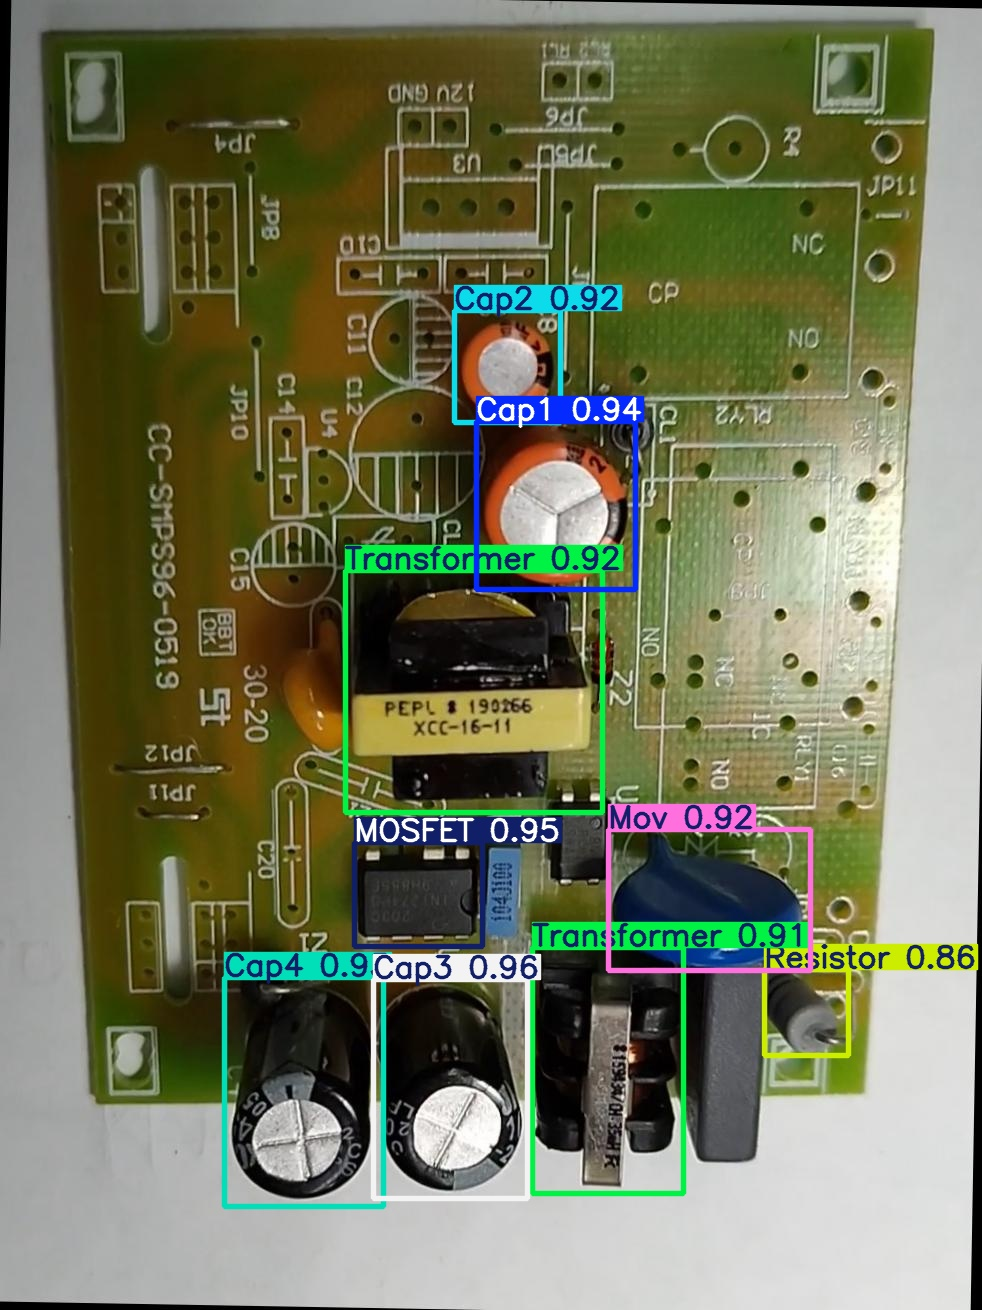

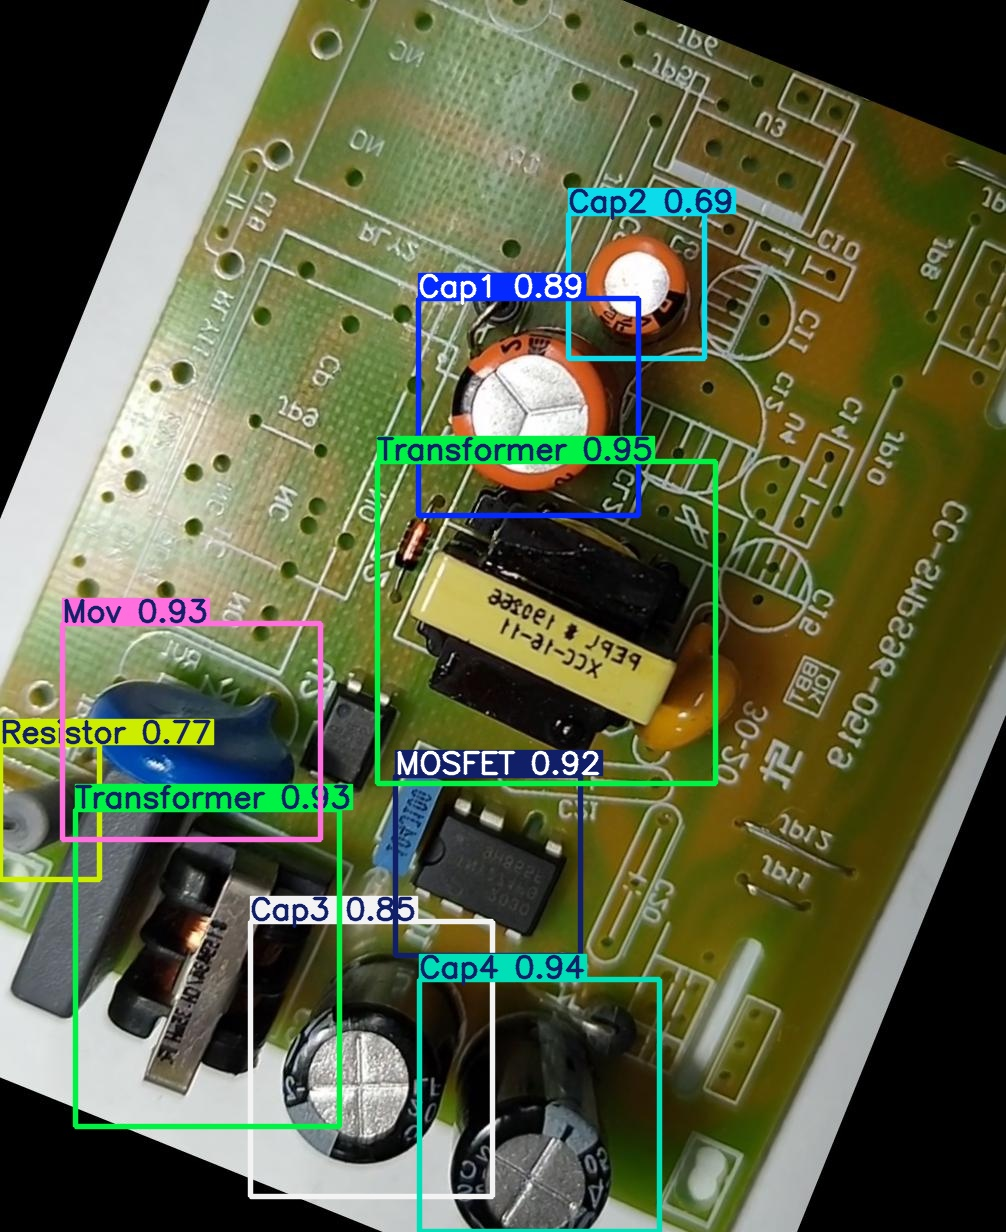

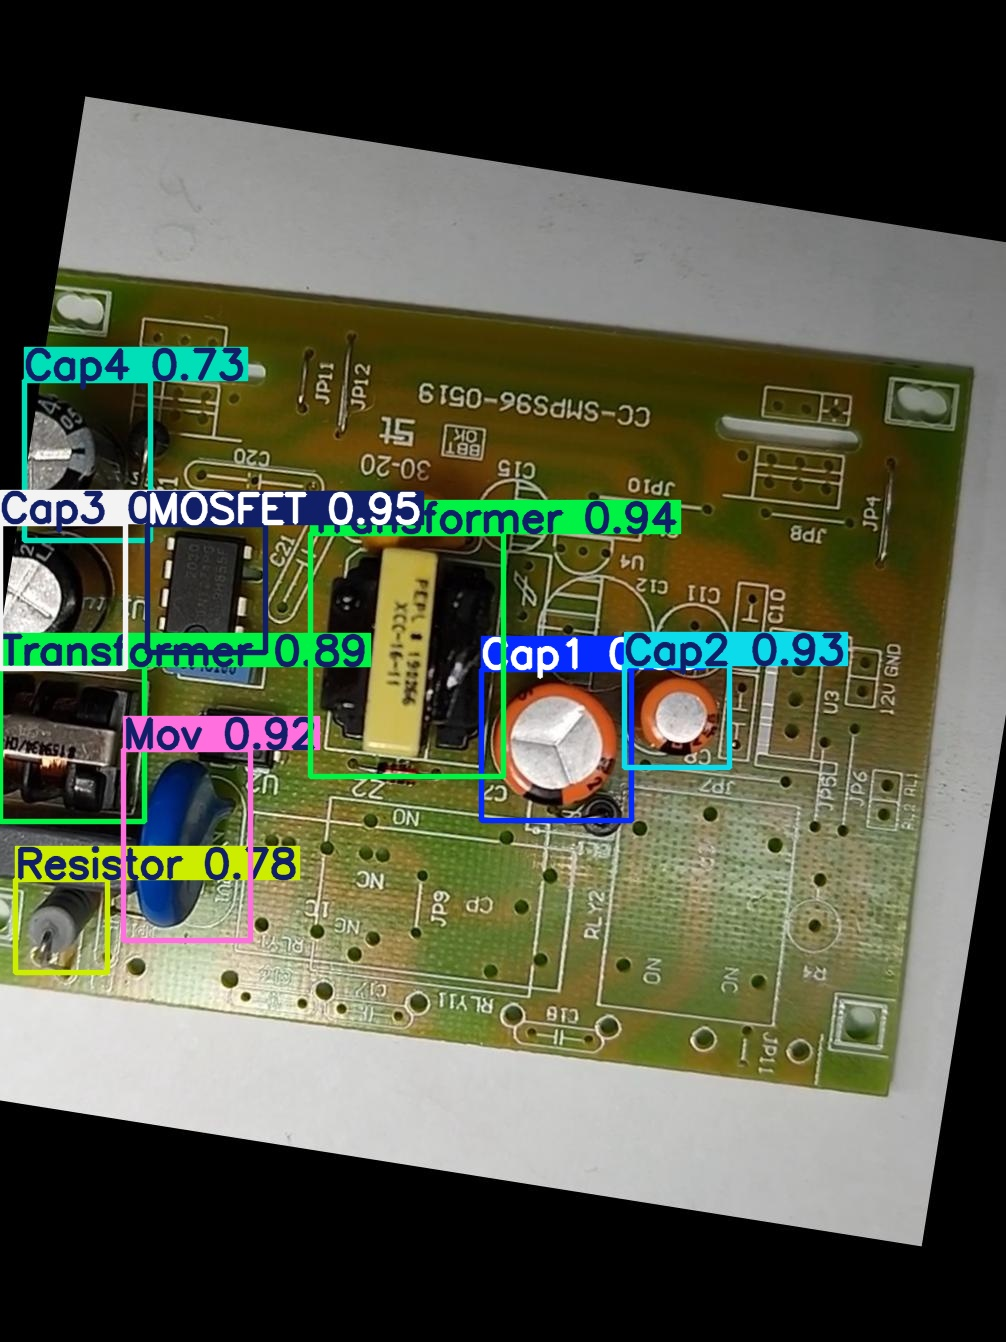

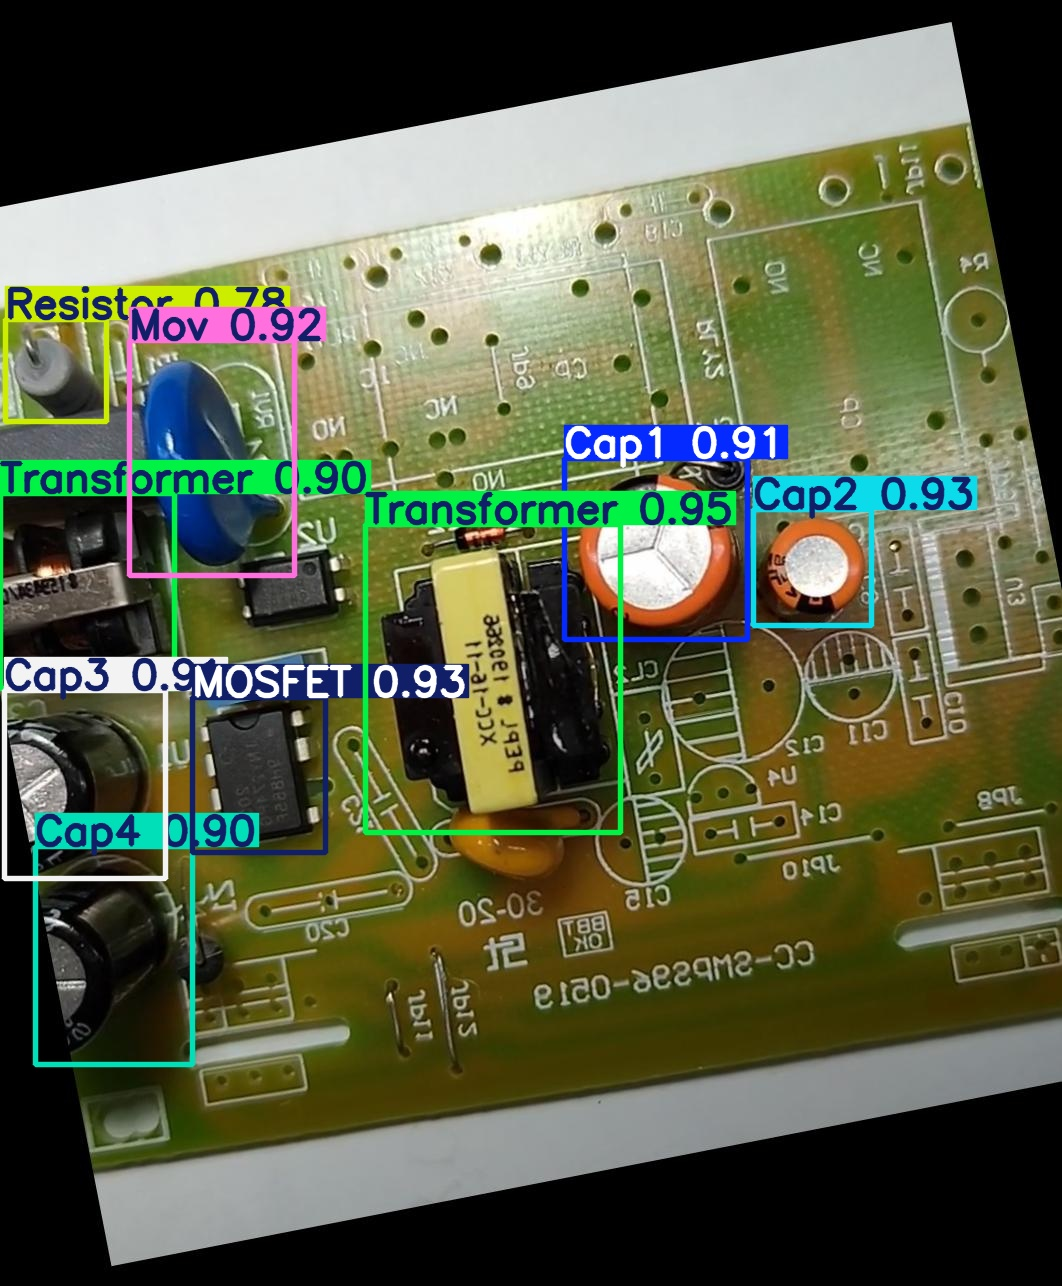

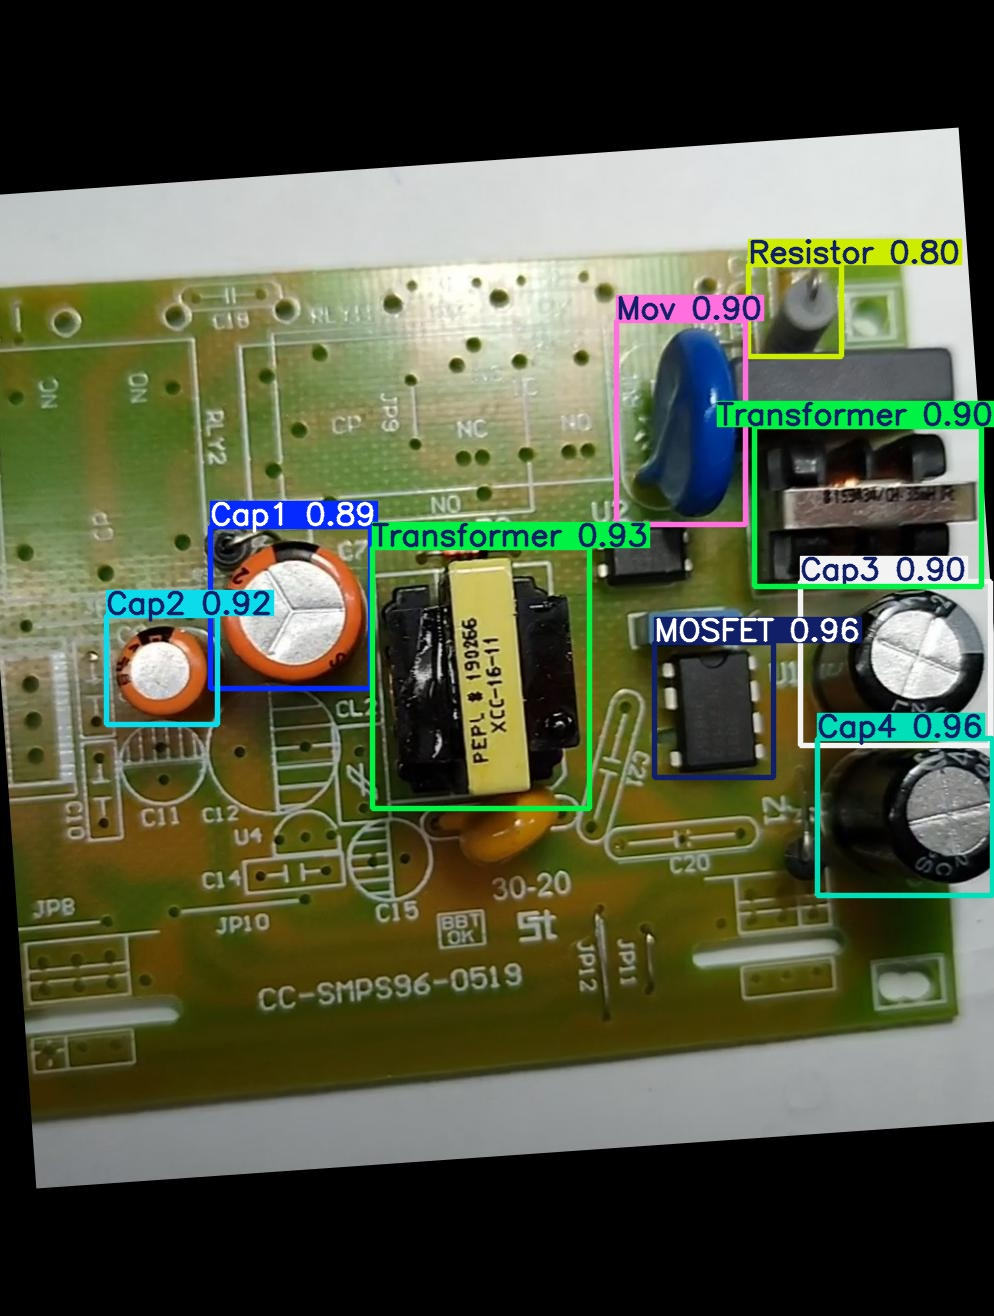

In [9]:
import glob
from IPython.display import Image, display
for image_path in glob.glob(f'/content/runs/detect/predict/*.jpg')[:5]:
  display(Image(filename=image_path, height=300))
  print('\n')

In [10]:
!mkdir /content/my_model
!cp /content/runs/detect/train/weights/best.pt /content/my_model/my_model.pt
!cp -r /content/runs/detect/train /content/my_model

%cd my_model
!zip /content/my_model.zip my_model.pt
!zip -r /content/my_model.zip train
%cd /content

/content/my_model
  adding: my_model.pt (deflated 9%)
  adding: train/ (stored 0%)
  adding: train/BoxR_curve.png (deflated 10%)
  adding: train/val_batch0_pred.jpg (deflated 5%)
  adding: train/val_batch0_labels.jpg (deflated 6%)
  adding: train/results.csv (deflated 60%)
  adding: train/BoxF1_curve.png (deflated 10%)
  adding: train/train_batch690.jpg (deflated 8%)
  adding: train/args.yaml (deflated 53%)
  adding: train/train_batch0.jpg (deflated 3%)
  adding: train/val_batch1_pred.jpg (deflated 7%)
  adding: train/val_batch2_pred.jpg (deflated 5%)
  adding: train/val_batch2_labels.jpg (deflated 6%)
  adding: train/results.png (deflated 7%)
  adding: train/train_batch692.jpg (deflated 9%)
  adding: train/confusion_matrix.png (deflated 24%)
  adding: train/weights/ (stored 0%)
  adding: train/weights/best.pt (deflated 9%)
  adding: train/weights/last.pt (deflated 9%)
  adding: train/train_batch1.jpg (deflated 5%)
  adding: train/train_batch2.jpg (deflated 4%)
  adding: train/labels.j

In [11]:
from google.colab import files

files.download('/content/my_model.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving test.jpg to test.jpg
User uploaded file "test.jpg" with length 13672 bytes
Ultralytics 8.3.228 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,007,403 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/test.jpg: 640x640 2 Cap3s, 10 Cap4s, 2 Movs, 1 Transformer, 8.7ms
Speed: 5.4ms preprocess, 8.7ms inference, 7.8ms postprocess per image at shape (1, 3, 640, 640)
Results saved to /content/runs/detect/predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict
Displaying prediction for test.jpg:


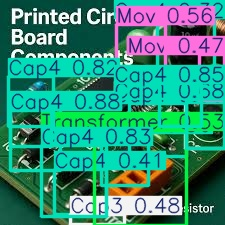

In [12]:
from google.colab import files
from IPython.display import Image, display
import os

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))
  # Save the uploaded file to a temporary location
  uploaded_image_path = f'/content/{fn}'
  with open(uploaded_image_path, 'wb') as f:
      f.write(uploaded[fn])

  # Run prediction with the uploaded image
  !yolo detect predict model=runs/detect/train/weights/best.pt source="{uploaded_image_path}" save=True

  # Get the path to the predicted image
  prediction_output_dir = '/content/runs/detect/predict'
  predicted_image_name = os.path.basename(uploaded_image_path)
  # Ultralytics appends the image name, sometimes with a number if it's not the first prediction run.
  # We need to find the correct predicted image path.
  # The output directory name for new predictions is predict and will increment if it already exists.
  # I'll list the directories in runs/detect and pick the latest one.

  all_predict_dirs = [d for d in os.listdir('/content/runs/detect') if d.startswith('predict')]
  latest_predict_dir = sorted(all_predict_dirs, key=lambda x: int(x.replace('predict', '') or 0), reverse=True)[0]

  final_predicted_image_path = os.path.join('/content/runs/detect', latest_predict_dir, predicted_image_name)

  if os.path.exists(final_predicted_image_path):
    print(f'Displaying prediction for {predicted_image_name}:')
    display(Image(filename=final_predicted_image_path, height=400))
  else:
    print(f'Could not find predicted image at {final_predicted_image_path}')

  # Clean up the uploaded file
  os.remove(uploaded_image_path)
